In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
file='D:\Competitions\Hackathon\MoviesOnStreamingPlatforms_updated.csv'
data = pd.read_csv(file)
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
cols = data.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [4]:
data.drop(['Unnamed: 0','ID',], axis=1, inplace = True)
cols = data.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


In [6]:
print("Percentage Missing Data")
(data.isnull().sum()/data.shape[0])*100

Percentage Missing Data


Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.577401
Runtime             3.535595
dtype: float64

In [7]:
data.Age.value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [8]:
age_map = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}        #redefining age group
data['intAge'] = data['Age'].map(age_map)    

In [9]:
data.head()    

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0


In [10]:
data['Rotten Tomatoes'].value_counts().sort_values(ascending=False)

100%    407
80%     162
50%     136
83%     131
67%     126
       ... 
28%      10
5%       10
4%        9
3%        4
2%        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

In [11]:
data['New_Rotten_Tomatoes'] = data['Rotten Tomatoes'].str.replace("%","")
for i in data['New_Rotten_Tomatoes']:
    if i is str:
        i = i.astype(int)


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                16744 non-null  object 
 1   Year                 16744 non-null  int64  
 2   Age                  7354 non-null   object 
 3   IMDb                 16173 non-null  float64
 4   Rotten Tomatoes      5158 non-null   object 
 5   Netflix              16744 non-null  int64  
 6   Hulu                 16744 non-null  int64  
 7   Prime Video          16744 non-null  int64  
 8   Disney+              16744 non-null  int64  
 9   Type                 16744 non-null  int64  
 10  Directors            16018 non-null  object 
 11  Genres               16469 non-null  object 
 12  Country              16309 non-null  object 
 13  Language             16145 non-null  object 
 14  Runtime              16152 non-null  float64
 15  intAge               7354 non-null  

In [13]:
data['New_Rotten_Tomatoes']


0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: object

Text(0.5, 1.0, 'Number of Movies age wise all platforms')

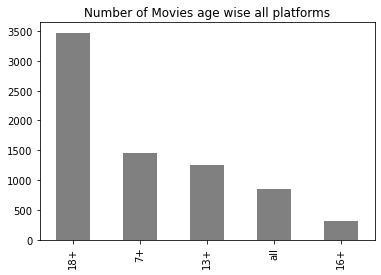

In [14]:
data['Age'].value_counts().plot(kind='bar',color='Grey')
plt.title("Number of Movies age wise all platforms")

Text(0.5, 1.0, 'Number of Movies age wise in NetFlix')

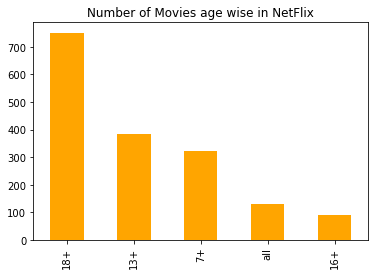

In [15]:
data_netflix = data.copy()
data_netflix = data_netflix[data['Netflix']==1]
data_netflix['Age'].value_counts().plot(kind='bar', color='Orange')
plt.title("Number of Movies age wise in NetFlix")

Text(0.5, 1.0, 'Number of Movies age wise in Hulu')

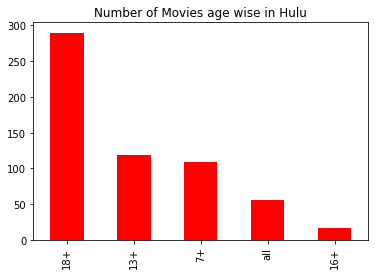

In [16]:
data_hulu = data.copy()
data_hulu = data_hulu[data['Hulu']==1]
data_hulu['Age'].value_counts().plot(kind='bar', color='Red')
plt.title("Number of Movies age wise in Hulu")

Text(0.5, 1.0, 'Number of Movies age wise in Prime')

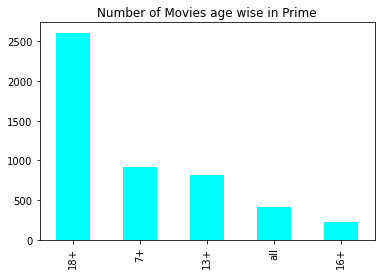

In [17]:
data_prime = data.copy()
data_prime = data_prime[data['Prime Video']==1]
data_prime['Age'].value_counts().plot(kind='bar', color='cyan')
plt.title("Number of Movies age wise in Prime")

Text(0.5, 1.0, 'Number of Movies age wise in Disney+')

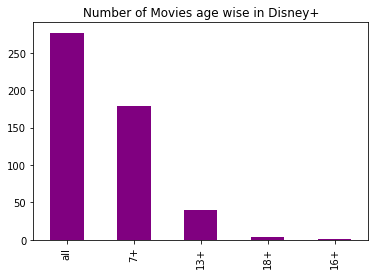

In [18]:
data_disney = data.copy()
data_disney = data_disney[data['Disney+']==1]
data_disney['Age'].value_counts().plot(kind='bar', color='Purple')
plt.title("Number of Movies age wise in Disney+")

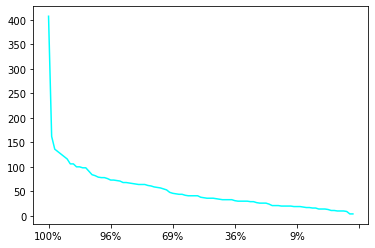

In [19]:
data['Rotten Tomatoes'].value_counts().plot(kind = 'line', color = 'Cyan')

In [20]:
rotten_tomato_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [data_prime['Rotten Tomatoes'].value_counts()[0], 
                                                             data_hulu['Rotten Tomatoes'].value_counts()[0],
                                                             data_disney['Rotten Tomatoes'].value_counts()[0],
                                                             data_netflix['Rotten Tomatoes'].value_counts()[0]]})
rotten_tomato_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,257
1,Hulu,18
2,Disney+,19
3,NetFlix,130


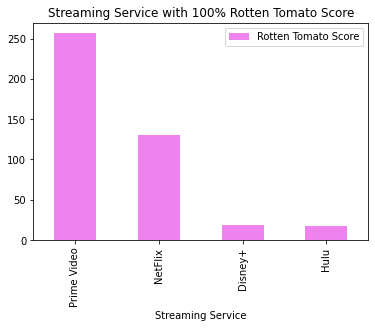

In [21]:
rotten_tomato_scores.sort_values(ascending=False, by="Rotten Tomato Score").plot(kind='bar', x='Streaming Service', y='Rotten Tomato Score', 
                           color='Violet', title="Streaming Service with 100% Rotten Tomato Score")

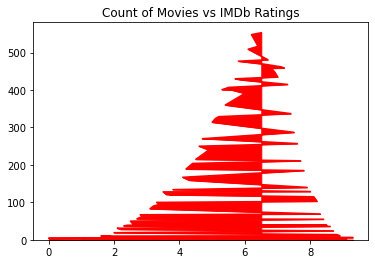

In [22]:
data['IMDb'].value_counts().plot(kind="area", color="Red",title = "Count of Movies vs IMDb Ratings")

In [23]:
def get_imdb_count_per_service(d):
    # This function returns the number of movies in a service having IMDb score greater than 7
    num_of_movies = 0
    for key,value in d.items():
        if key>=7:
            num_of_movies+=value
    return num_of_movies

In [24]:
imdb_prime_count = get_imdb_count_per_service(dict(data_prime['IMDb'].value_counts().sort_values(ascending=False)))
imdb_hulu_count = get_imdb_count_per_service(dict(data_hulu['IMDb'].value_counts().sort_values(ascending=False)))
imdb_disey_count = get_imdb_count_per_service(dict(data_disney['IMDb'].value_counts().sort_values(ascending=False)))
imdb_netflix_count = get_imdb_count_per_service(dict(data_netflix['IMDb'].value_counts().sort_values(ascending=False)))

imdb_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'IMDb Score' :[imdb_prime_count, imdb_hulu_count, imdb_disey_count, imdb_netflix_count] })
imdb_scores.head()

,Streaming Service,IMDb Score
0,Prime Video,2529
1,Hulu,234
2,Disney+,181
3,NetFlix,1011


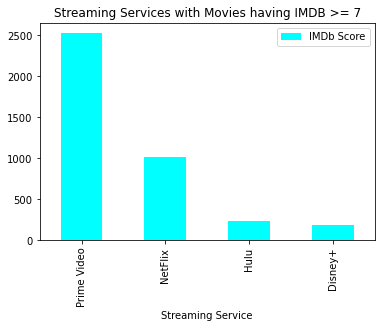

In [25]:
imdb_scores.sort_values(ascending=False, by='IMDb Score').plot(kind="bar", color="Cyan",x='Streaming Service', 
                  title = "Streaming Services with Movies having IMDB >= 7")

In [26]:
data['Language'].value_counts()

English                                   10955
Hindi                                       503
English,Spanish                             276
Spanish                                     267
English,French                              174
                                          ...  
English,Japanese,French,Arabic                1
Mandarin,Bengali,Hindi,Spanish,English        1
English,Russian,French,German                 1
Portuguese,English,Spanish                    1
English,German,French,Swedish                 1
Name: Language, Length: 1102, dtype: int64

In [27]:
languages_dict = dict(data['Language'].value_counts())
languages = set()
for lang,count in languages_dict.items():
    curr_lang = lang
    curr_langs = curr_lang.split(",")
    for i in curr_langs:
        if i in languages:
            continue
        else:
            languages.add(i.lower())
languages = list(languages)
print("Total number of languages are : ", len(languages))

Total number of languages are :  178


In [28]:
languages_count = dict()
for lang,count in languages_dict.items():
    curr_lang = lang.split(",")
    for i in curr_lang:
        if i in languages_count.keys():
            languages_count[i] = languages_count.get(i) + 1
        else:
            languages_count[i] = 1

In [29]:
lang_count_df = pd.DataFrame(languages_count.items(), columns=['Language', 'Count'])
lang_count_df.head()

,Language,Count
0,English,785
1,Hindi,100
2,Spanish,192
3,French,279
4,Italian,129


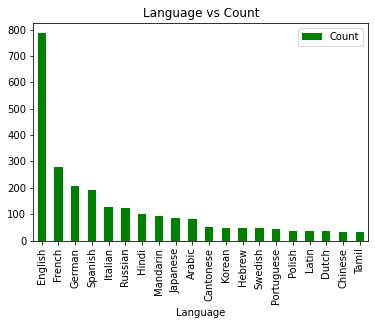

In [30]:
lang_count_df.sort_values(ascending=False, by='Count')[:20].plot(kind='bar', 
                                                                  x='Language', 
                                                                  color='Green', 
                                                                  title='Language vs Count')

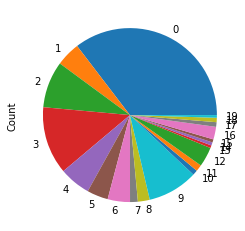

In [31]:
lang_count_df_copy = lang_count_df[:20]
lang_count_df_copy['Count'].plot(kind='pie')

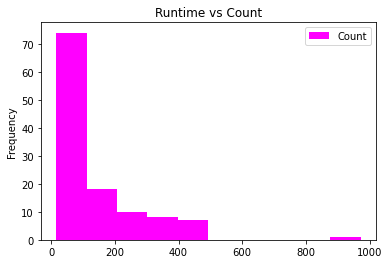

In [32]:
pd.DataFrame(dict(data['Runtime'].value_counts().sort_values(ascending=False)[:20]).items(), columns=['Runtime', 'Count']).plot(kind='hist' ,
                                                                                                                                 x='Runtime', 
                                                                                                                                 title='Runtime vs Count',
                                                                                                                                color='Magenta')

In [33]:
len(data['Directors'])

16744

In [34]:
directors = list(set(data['Directors']))
directors.pop(0) #TO REMOVE NAN VALUE
len(directors)

11338

In [35]:
new_director = set()
for d in directors:
    curr_d = d.split(",")
    for direc in curr_d:
        if direc in new_director:
            continue
        else:
            new_director.add(direc)
len(new_director)

12453

In [36]:
new_data = data[data['Directors'].notna()]
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
        else:
            directors_count[xd] = 1

In [37]:
directors_count_df = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
directors_count_df.sort_values(ascending=False, by='Count').head()

,Director,Count
976,Jay Chapman,36
8165,Joseph Kane,31
1102,Cheh Chang,29
4826,Jim Wynorski,23
6949,William Beaudine,23


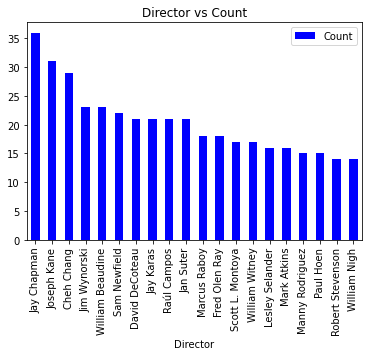

In [38]:
directors_count_df.sort_values(ascending=False, by='Count')[:20].plot(kind='bar', 
                                                                  x='Director', 
                                                                 color='Blue', 
                                                                  title='Director vs Count')

In [39]:
#data[data['Directors']=='Jay Chapman']

In [40]:
#Movies available in Netflix and Prime Video
temp_data = data[data['Netflix']==1]
temp_data = temp_data[temp_data['Prime Video']==1]
temp_data

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,18.0,95
11,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0,13.0,100
15,Once Upon a Time in the West,1968,13+,8.5,95%,1,0,1,0,0,Sergio Leone,Western,"Italy,United States","Italian,English,Spanish",165.0,13.0,95
31,Drive,2011,18+,7.8,92%,1,0,1,0,0,Nicolas Winding Refn,"Crime,Drama",United States,"English,Spanish",100.0,18.0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Hisss,2010,NaN,2.8,NaN,1,0,1,0,0,Jennifer Lynch,"Comedy,Drama,Horror,Thriller","India,United States","English,Hindi",98.0,NaN,NaN
3440,Coffee with D,2017,13+,4.4,17%,1,0,1,0,0,Vishal Mishra,Comedy,India,NaN,123.0,13.0,17
3445,Cappuccino,2017,NaN,3.8,NaN,1,0,1,0,0,Jon Amiel,Comedy,"United Kingdom,United States",English,112.0,NaN,NaN
3512,Paradise Lost,2017,NaN,NaN,NaN,1,0,1,0,0,NaN,"Drama,Mystery",NaN,NaN,NaN,NaN,NaN


In [41]:
#Movies available in Netflix and Hulu
temp_data_nh = data[data['Netflix']==1]
temp_data_nh = temp_data_nh[temp_data_nh['Hulu']==1]
#list(temp_data_nh['Title'])

In [44]:
genres_unclean = dict(data['Genres'].value_counts())
genres = set()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in genres:
            continue
        else:
            genres.add(xg)

count_genres = dict()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in count_genres.keys():
            count_genres[xg] = count_genres.get(xg)+1
        else:
            count_genres[xg] = 1

In [45]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])


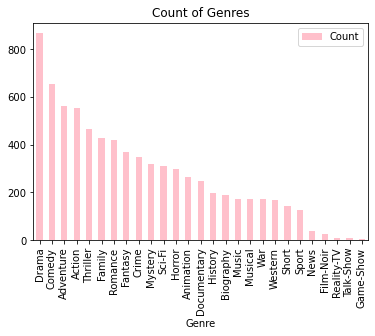

In [46]:
count_genres_df.sort_values(ascending=False, by='Count').plot(kind="bar", x='Genre', title='Count of Genres', color='pink')

In [47]:
data_netflix_top = data_netflix[data_netflix['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

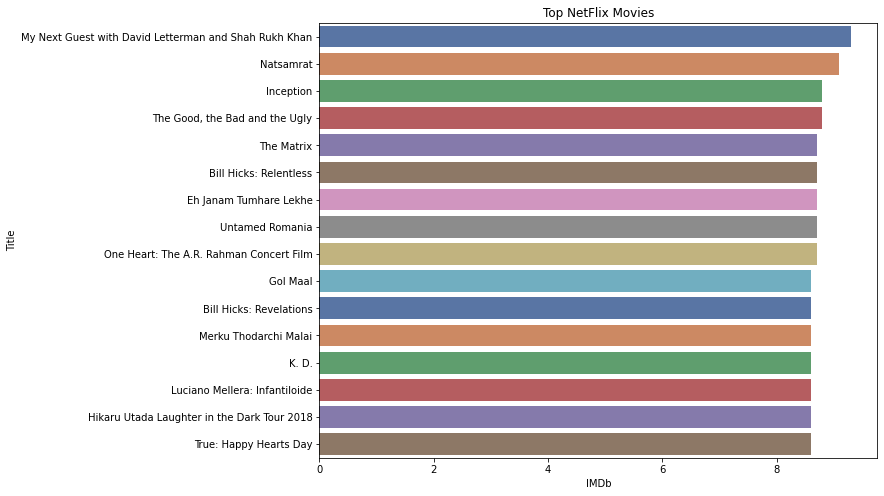

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_netflix_top, palette='deep')
plt.title('Top NetFlix Movies')
plt.show()


In [49]:
data_hulu_top = data_hulu[data_hulu['IMDb']>8.5]
data_hulu_top = data_hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
    

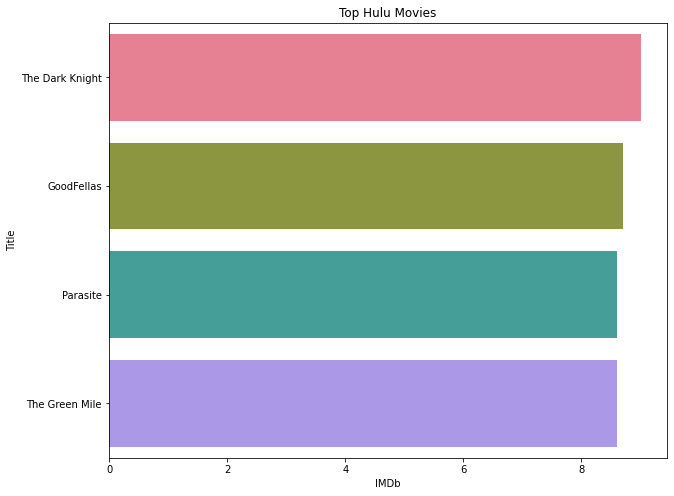

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_hulu_top, palette='husl')
plt.title('Top Hulu Movies')
plt.show()


In [51]:
data_disney_top = data_disney[data_disney['IMDb']>8.5]
data_disney_top = data_disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')


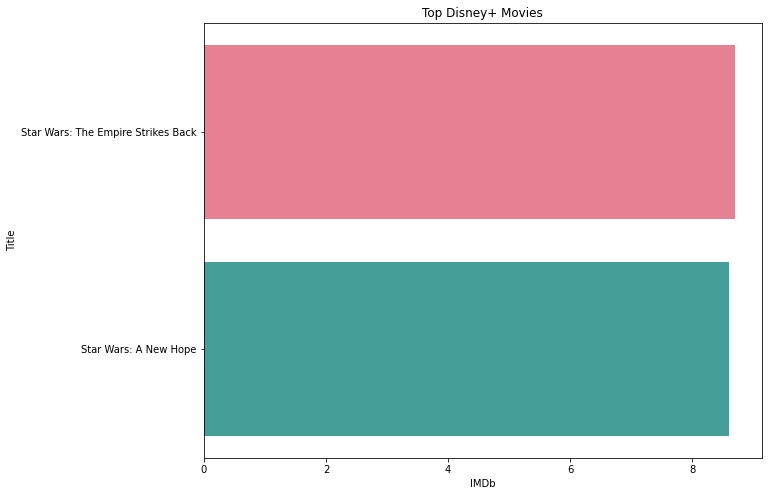

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_disney_top, palette='husl')
plt.title('Top Disney+ Movies')
plt.show()


In [53]:
data_prime_top = data_prime[data_prime['IMDb']>8.5]
data_prime_top = data_prime_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')[:10]


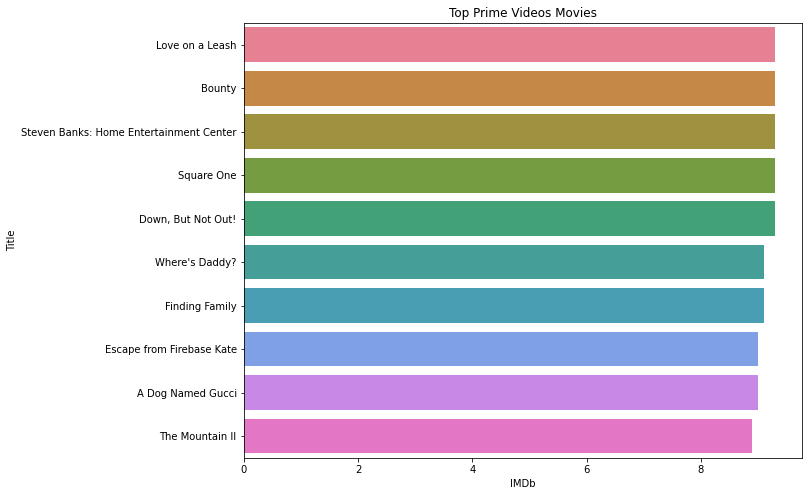

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_prime_top, palette='husl')
plt.title('Top Prime Videos Movies')
plt.show()


In [55]:
dur_n = round(data_netflix['Runtime'].sum()/data_netflix.shape[0],2)
dur_h = round(data_hulu['Runtime'].sum()/data_hulu.shape[0],2)
dur_p = round(data_prime['Runtime'].sum()/data_prime.shape[0],2)
dur_d = round(data_disney['Runtime'].sum()/data_disney.shape[0],2)
print(dur_n, dur_h, dur_p, dur_d)


92.83 95.46 89.6 88.98


In [56]:
duration_df = pd.DataFrame({
    'Streaming Platform' : ['NetFlix','Hulu','Prime Video','Disney+'],
    'Duration' : [dur_n, dur_h, dur_p, dur_d]
})
duration_df.head()


,Streaming Platform,Duration
0,NetFlix,92.83
1,Hulu,95.46
2,Prime Video,89.60
3,Disney+,88.98


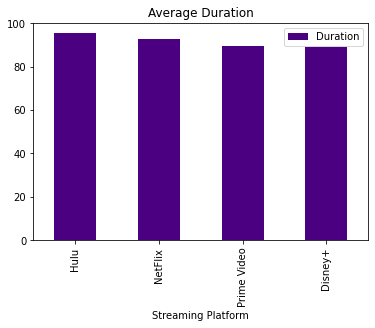

In [57]:
duration_df.sort_values(ascending=False, by='Duration').plot(kind="bar", x='Streaming Platform', 
                                                              title='Average Duration', color='indigo')
